<a href="https://colab.research.google.com/github/vinodvicki/time_series_forecasting_on_super_store-/blob/main/time_series_forcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# conecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datasets /Time_series_forcast/Sample - Superstore.xls")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df.Category.value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


In [ ]:
df.groupby(df.Category).Sales.sum()

,Sales
Category,
Furniture,741999.7953
Office Supplies,719047.0320
Technology,836154.0330


Steps for ARIMA-based Time Series Forecasting
Data Preparation:

Extract the Order Date and Sales columns.
Set Order Date as the time index and aggregate sales by a chosen frequency (e.g., daily, monthly).


In [ ]:
# DATA VISYALIZATION on Order Date and sales
import datetime as dt
df["Order Date"] = pd.to_datetime(df['Order Date'])
sales_df = df[["Order Date", "Sales"]].set_index("Order Date")
sales_df.head()

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2016-06-12,14.6200
2015-10-11,957.5775
2015-10-11,22.3680


In [16]:
# aggeragating sales data into monthly data for ARIMA model
sales_df_monthly = sales_df.resample('m').sum()
sales_df_monthly.head()

,Sales
Order Date,
2014-01-31,14236.895
2014-02-28,4519.892
2014-03-31,55691.009
2014-04-30,28295.345
2014-05-31,23648.287


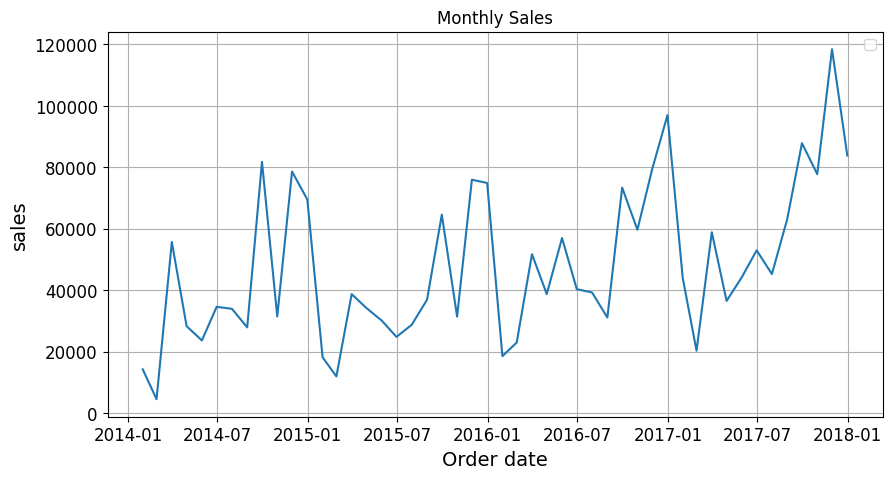

In [26]:
# Plothing monthly sales with respective order date
plt.figure(figsize=(10, 5))
plt.plot(sales_df_monthly)
plt.title("Monthly Sales")
plt.xlabel("Order date")
plt.ylabel('sales')
plt.grid(True)
plt.legend()
plt.show()

Next Steps: Stationarity Check
We'll test for stationarity using the Augmented Dickey-Fuller (ADF) test and apply differencing if necessary to make the series stationary. Let me proceed

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine if a time series is stationary or non-stationary

In [32]:
# Perform the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
result = adfuller(sales_df_monthly['Sales'])
adf_output = {'test statistic':result[0],
              'p-value': result[1],
              "lage":result[2],
              "critical values":result[4],
              "Number of Observations Used": result[3]
              }
adf_output

{'test statistic': -4.493767844002665,
 'p-value': 0.00020180198458237758,
 'lage': 0,
 'critical values': {'1%': -3.5778480370438146,
  '5%': -2.925338105429433,
  '10%': -2.6007735310095064},
 'Number of Observations Used': 47}

The Augmented Dickey-Fuller (ADF) test results indicate:

Test Statistic: -4.4938
p-value: 0.0002
Critical Values:
1%: -3.5778
5%: -2.9253
10%: -2.6008
Since the p-value < 0.05 and the test statistic is less than the 1% critical value, the time series is already stationary. No differencing is required.

Next Steps: Parameter Selection for ARIMA
We will identify the optimal ARIMA parameters (p, d, q) using the Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF). Let me calculate and visualize these

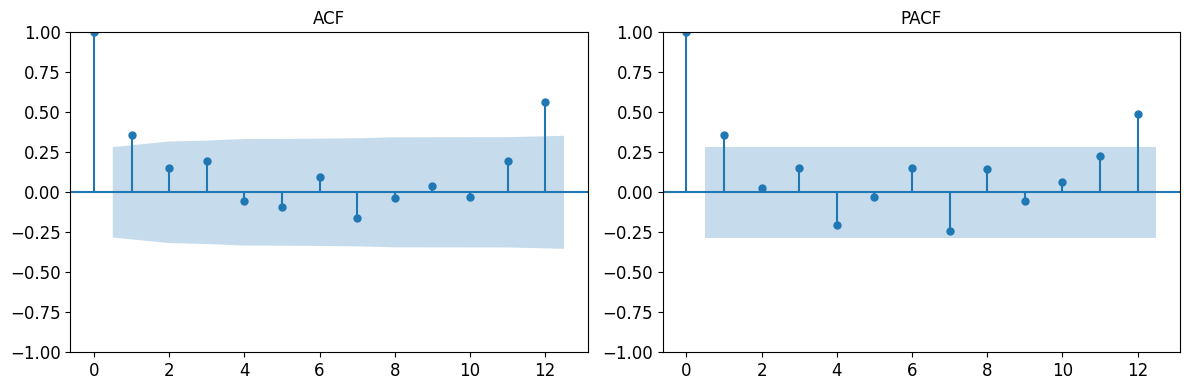

In [44]:
# performing parameters for AFC and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF and PACF for the stationary series
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plot_acf(sales_df_monthly['Sales'],lags=12,ax=plt.gca(),title= "ACF")
plt.subplot(1,2,2)
plot_pacf(sales_df_monthly['Sales'],lags=12,ax=plt.gca(),title= "PACF")
plt.tight_layout()
plt.show()
